# Relational Data
## Source: https://paleobiodb.org/

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import plotly.express as px
import random
import seaborn as sns
import plotly.figure_factory as ff

In [76]:
# load the Taxon data
df = pd.read_csv("Crocodylomorpha_Data.csv")
df

,occurrence_no,record_type,reid_no,flags,collection_no,identified_name,identified_rank,identified_no,difference,accepted_name,...,authorizer,enterer,modifier,created,modified,paleomodel,geoplate,paleoage,paleolng,paleolat
0,30261,occ,22457.0,NaN,2225,Crocodylomorpha indet.,unranked clade,209375,NaN,Crocodylomorpha,...,J. Alroy,J. Alroy,NaN,11/24/2009 20:16,11/24/2009 22:16,gplates,305,mid,25.43,30.18
1,30690,occ,22459.0,NaN,2237,Crocodylomorpha indet.,unranked clade,209375,NaN,Crocodylomorpha,...,J. Alroy,J. Alroy,NaN,11/24/2009 20:18,11/24/2009 22:18,gplates,305,mid,27.08,42.09
2,40163,occ,18506.0,NaN,3113,Crocodylia indet.,unranked clade,38309,NaN,Crocodylia,...,J. Alroy,J. Alroy,NaN,10/15/2006 11:06,10/15/2006 13:06,gplates,109,mid,-44.51,40.13
3,40167,occ,NaN,NaN,3113,Thoracosaurus basifissus,species,216615,nomen dubium,Gavialoidea,...,M. Patzkowsky,K. Layou,M. Uhen,7/26/1999 10:49,8/15/2019 13:47,gplates,109,mid,-44.51,40.13
4,40168,occ,NaN,NaN,3113,Thoracosaurus basitruncatus,species,216614,nomen dubium,Gavialoidea,...,M. Patzkowsky,K. Layou,M. Uhen,7/26/1999 10:49,8/15/2019 13:47,gplates,109,mid,-44.51,40.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,1628546,occ,NaN,NaN,230676,Peirosauridae indet.,unranked clade,373244,NaN,Peirosauridae,...,P. Mannion,P. Mannion,P. Mannion,7/11/2023 11:53,7/11/2023 11:53,gplates,201,mid,-29.17,-24.81
5428,1628971,occ,NaN,NaN,56157,Notosuchia indet.,infraorder,157794,NaN,Notosuchia,...,M. Carrano,M. Carrano,M. Carrano,7/14/2023 13:15,7/14/2023 13:15,gplates,291,mid,-43.41,-38.60
5429,1628999,occ,NaN,NaN,147191,Caimaninae indet.,unranked clade,194769,NaN,Caimaninae,...,P. Holroyd,K. Magoulick,NaN,7/14/2023 14:44,7/14/2023 14:44,gplates,not computable using this model,mid,NaN,NaN
5430,1629196,occ,NaN,NaN,230753,Alligator mississippiensis,species,110824,NaN,Alligator mississippiensis,...,P. Holroyd,K. Magoulick,NaN,7/17/2023 15:20,7/17/2023 15:20,gplates,not computable using this model,mid,NaN,NaN


In [77]:
df.columns

Index(['occurrence_no', 'record_type', 'reid_no', 'flags', 'collection_no',
       'identified_name', 'identified_rank', 'identified_no', 'difference',
       'accepted_name', 'accepted_attr', 'accepted_rank', 'accepted_no',
       'early_interval', 'late_interval', 'max_ma', 'min_ma', 'reference_no',
       'lng', 'lat', 'cc', 'state', 'county', 'latlng_basis',
       'latlng_precision', 'geogscale', 'geogcomments', 'protected',
       'cx_int_no', 'formation', 'stratgroup', 'member', 'formation.1',
       'stratgroup.1', 'member.1', 'stratscale', 'zone', 'localsection',
       'localbed', 'localbedunit', 'localorder', 'regionalsection',
       'regionalbed', 'regionalbedunit', 'regionalorder', 'stratcomments',
       'lithdescript', 'lithology1', 'lithadj1', 'lithification1',
       'minor_lithology1', 'fossilsfrom1', 'lithology2', 'lithadj2',
       'lithification2', 'minor_lithology2', 'fossilsfrom2', 'lithdescript.1',
       'lithology1.1', 'lithadj1.1', 'lithification1.1', 'minor

In [78]:
df.nunique()

occurrence_no    5432
record_type         1
reid_no           609
flags               3
collection_no    3863
                 ... 
paleomodel          1
geoplate           55
paleoage            1
paleolng         2338
paleolat         2132
Length: 85, dtype: int64

In [79]:
# years from current to 541 MA in millions of years
years = range(1, int(df["max_ma"].max())) 
years

range(1, 237)

In [80]:
# Create a new dataframe, iterating over the years

# Remove any NaN values
dfExtinct = pd.DataFrame(years, columns=["years ma"])

#dfExtinct["extinct"] = 
dfExtinct.head()

,years ma
0,1
1,2
2,3
3,4
4,5


In [179]:
# Create a midpoint of firat apperence and last apperance

# Mark all occurances after palecene thermal maximum
df["mid"] = ((df["max_ma"] + df["min_ma"]) / 2)
df["post_petm"] = df["min_ma"] < 55
df["near_petm"] = np.where( ~df["post_petm"], False, df["min_ma"] > 40)
# Revomve missing
df = df.dropna(subset=["mid","paleolat"])

# Convert to float
df["mid"] = df["mid"].astype(float)


In [176]:
# bin the data for lat/long and midpoints
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]
labels = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]
df['mid_binned'] = pd.cut(df['mid'], bins=bins, labels=labels)

In [91]:
grouped = df[["mid_binned","accepted_name"]].groupby(["mid_binned"]).count().reset_index()
grouped = grouped.rename(columns={"accepted_name":"accepted_count"})
grouped.head(20)

,mid_binned,accepted_count
0,10,688
1,20,477
2,30,116
3,40,205
4,50,231
5,60,382
6,70,843
7,80,512
8,90,78
9,100,186


In [85]:
df = df.merge(grouped, how='inner', on='mid_binned')

In [172]:
df[["accepted_name","accepted_count","mid","paleolat","cc","post_petm","near_petm","mid_binned"]].tail(20)

,accepted_name,accepted_count,mid,paleolat,cc,post_petm,near_petm,mid_binned
5130,Macrospondylus bollensis,30,178.40,37.83,DE,False,False,180
5131,Macrospondylus bollensis,30,178.40,39.52,DE,False,False,180
5132,Macrospondylus bollensis,30,177.85,38.81,DE,False,False,180
5133,Macrospondylus bollensis,30,177.85,38.81,DE,False,False,180
5134,Macrospondylus bollensis,30,177.85,38.81,DE,False,False,180
5135,Macrospondylus bollensis,30,178.40,39.52,DE,False,False,180
5136,Macrospondylus bollensis,30,177.85,38.81,DE,False,False,180
5137,Zoneait nargorum,30,171.95,31.30,US,False,False,180
5138,Thalattosuchia,30,177.85,-35.49,AR,False,False,180
5139,Thalattosuchia,30,178.80,34.78,FR,False,False,180


In [180]:
df[df["near_petm"]]

,occurrence_no,record_type,reid_no,flags,collection_no,identified_name,identified_rank,identified_no,difference,accepted_name,...,geoplate,paleoage,paleolng,paleolat,mid,pre_petm,mid_binned,accepted_count,near_petm,post_petm
176,168759,occ,NaN,NaN,15458,Borealosuchus sp.,genus,110899,NaN,Borealosuchus,...,101,mid,-79.64,51.58,53.05,True,60,382,True,True
177,211735,occ,NaN,NaN,15895,n. gen. Chrysochampsa n. sp. mlynarskii,species,274001,recombined as,Allognathosuchus mlynarskii,...,101,mid,-72.92,53.35,53.05,True,60,382,True,True
178,211736,occ,NaN,NaN,15895,Allognathosuchus sp.,genus,38424,NaN,Allognathosuchus,...,101,mid,-72.92,53.35,53.05,True,60,382,True,True
179,211737,occ,NaN,NaN,15895,Crocodylidae indet.,unranked clade,38435,NaN,Crocodylidae,...,101,mid,-72.92,53.35,53.05,True,60,382,True,True
180,286254,occ,NaN,NaN,27268,Crocodylidae indet.,unranked clade,38435,NaN,Crocodylidae,...,101,mid,-81.84,50.34,53.05,True,60,382,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1607164,occ,NaN,NaN,120036,Tomistomidae indet.,unranked clade,401902,obsolete variant of,Tomistominae,...,305,mid,14.20,42.07,44.50,True,50,231,True,True
2526,1607165,occ,NaN,NaN,120036,Pristichampsus rollinatii,species,38456,nomen dubium,Eusuchia,...,305,mid,14.20,42.07,44.50,True,50,231,True,True
2527,1607171,occ,NaN,NaN,120036,Baryphracta deponiae,species,190765,recombined as,Diplocynodon deponiae,...,305,mid,14.20,42.07,44.50,True,50,231,True,True
2528,1607189,occ,NaN,NaN,120798,n. gen. Baryphracta n. sp. deponiae,species,190765,recombined as,Diplocynodon deponiae,...,305,mid,14.20,42.07,44.50,True,50,231,True,True


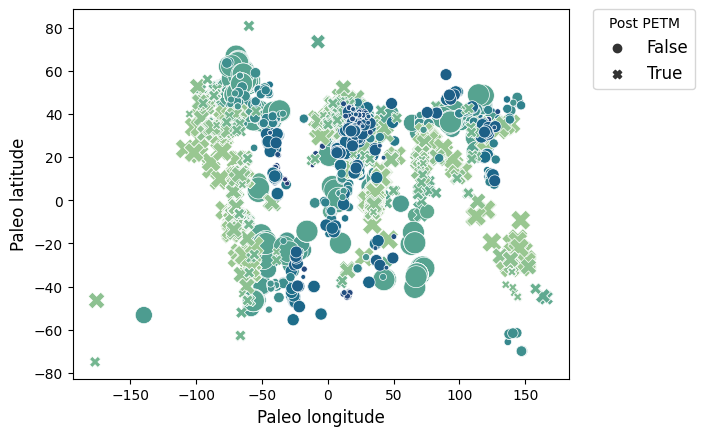

In [178]:
# Create seaborn chart

# Set the style
g = sns.scatterplot(
        data=df, y="paleolat", x="paleolng", 
        hue="mid_binned", size="accepted_count",
        palette="crest", style="post_petm",
        sizes=(10, 250), label=None
)
#g.get_legend().set_visible(False)


h,l = g.get_legend_handles_labels()
plt.legend( h[-2:],l[-2:], title='Post PETM',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)

g.set_xlabel("Paleo longitude",fontsize=12)
g.set_ylabel("Paleo latitude",fontsize=12)
plt.show(g)